In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [44]:
salary = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
#salary
salary.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

Performing the EDA

In [3]:
salary['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

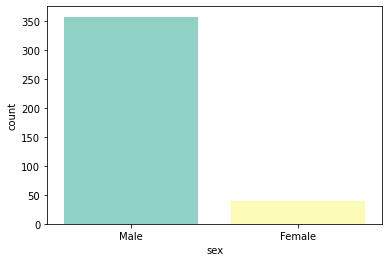

In [4]:
sns.countplot(salary['sex'], palette='Set3', saturation=0.9, dodge=True)

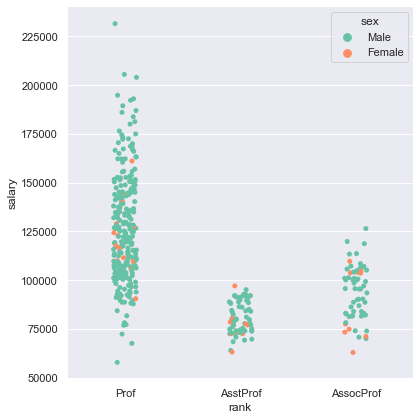

In [5]:
sns.set_theme(style="darkgrid")
sns.catplot(x="rank", y="salary", hue="sex", data=salary,  height=6, aspect=1, palette='Set2',legend_out=False)


    Prof-rank: has the highest salary counts with ranks count.
    Asstprof_rank: has the lowest salary counts with ranks counts too.
    Assocprof_rank: has the medium salary counts with ranks counts too.

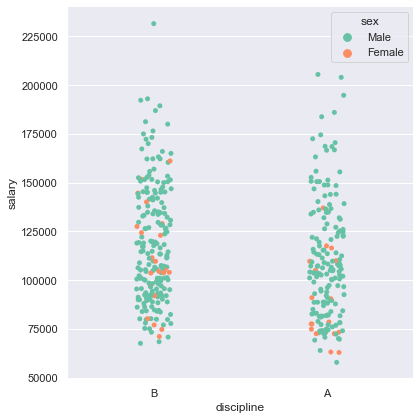

In [6]:
sns.set_theme(style="darkgrid")
sns.catplot(x="discipline", y="salary", hue="sex", data=salary,  height=6, aspect=1, palette= 'Set2', legend_out= False)

     As we can see according to the discipline we have more of males in both the discipline A & B
     The B category discipline has the Max amount of salary than A

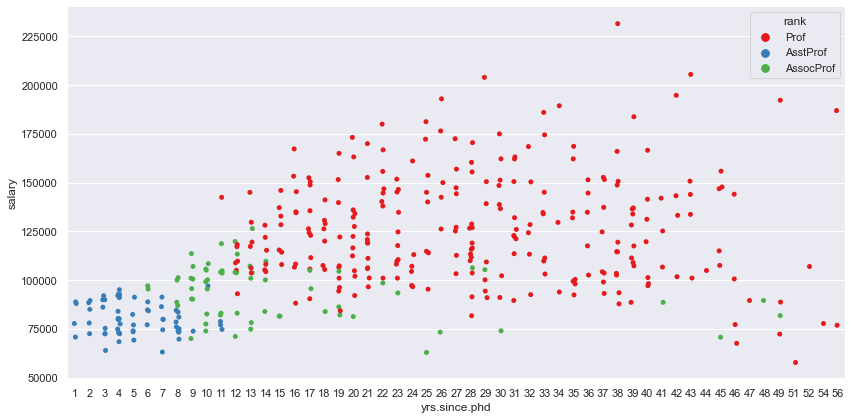

In [7]:
sns.set_theme(style="darkgrid")
sns.catplot(x="yrs.since.phd", y="salary", hue="rank", data=salary,  height=6, aspect=2, palette='Set1',legend_out=False)

       As it can be seen that the according to increase in the years of phd completed the salary is 
       moving up simultaneously.
       As it can be seen that the rank prof is more in case of completition of degree Phd.

<AxesSubplot:>

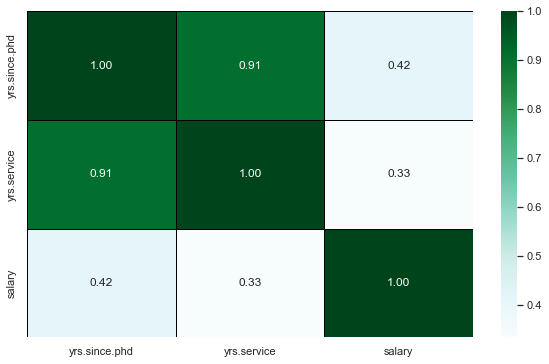

In [8]:
#Finding the Correlation
salary.corr()
salary.corr()['salary'].sort_values()
#Corelation heatmap
import matplotlib.pyplot  as plt
# making  the  canvas  size
plt.figure(figsize=(10,6))
sns.heatmap(salary.corr(),annot =True, linewidths=0.5, linecolor='black', fmt='.2f',cmap='BuGn')

    yrs.since.phd is 42% correlated to salary which is a good score
    yrs.service is 33% correlated to salary whcih is also a good score

In [9]:
#Describing the Data
salary.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


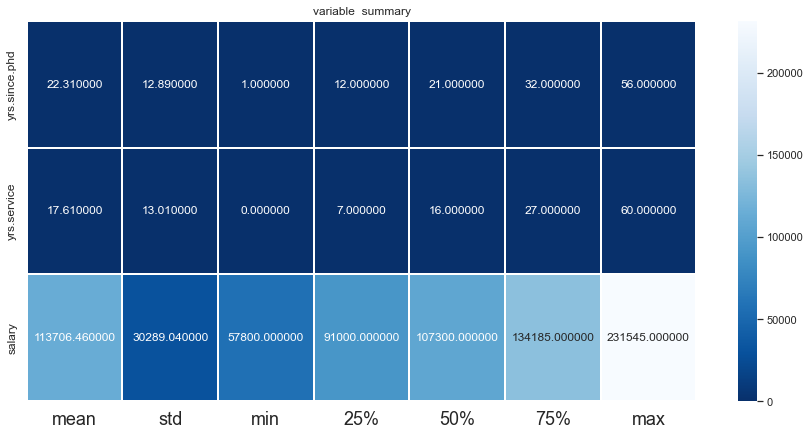

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(round(salary.describe()[1:].transpose(),2), linewidth =2, fmt='f', annot=True,cmap='Blues_r')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variable  summary')
plt.show()

In [11]:
salary.info

<bound method DataFrame.info of          rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male  139750
1        Prof          B             20           16  Male  173200
2    AsstProf          B              4            3  Male   79750
3        Prof          B             45           39  Male  115000
4        Prof          B             40           41  Male  141500
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

[397 rows x 6 columns]>

<AxesSubplot:xlabel='yrs.service'>

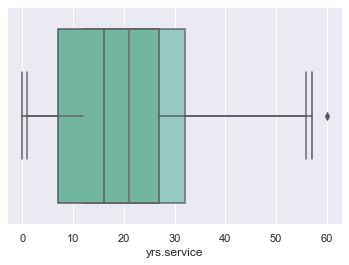

In [12]:
#outliers checking
sns.boxplot(salary['yrs.since.phd'], palette='Set3')
sns.boxplot(salary['yrs.service'], palette='Set2')

In [13]:
salary.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

Graph reprresentation of the columns


<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

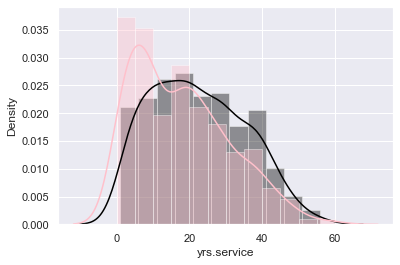

In [14]:
sns.distplot(salary['yrs.since.phd'], color ='black')
sns.distplot(salary['yrs.service'], color='pink')

Data Cleaning and preprocessing.,
Feature engineering (encoding).,
labelEncoding the categorical columns

In [15]:
from sklearn.preprocessing  import LabelEncoder
le=LabelEncoder()
salary['rank']=le.fit_transform(salary['rank'])
salary['discipline']=le.fit_transform(salary['discipline'])
salary['sex']=le.fit_transform(salary['sex'])
salary.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
5,0,1,6,6,1,97000
6,2,1,30,23,1,175000
7,2,1,45,45,1,147765
8,2,1,21,20,1,119250
9,2,1,18,18,0,129000


In [16]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
def  calcvif(x):
    vif =pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [18]:
salary.drop(['yrs.since.phd'],axis=1, inplace=True)

In [19]:
salary.drop(['rank'], axis=1, inplace =True)

In [20]:
salary.drop(['discipline'], axis=1, inplace=True)

In [21]:
salary.drop(['sex'], axis=1, inplace=True)

In [22]:
#Outliers removal with Scipy
import scipy
from scipy.stats import zscore

z= np.abs(zscore(salary))
z

,yrs.service,salary
0,0.029669,0.860919
1,0.124300,1.966672
2,1.125098,1.122495
3,1.646343,0.042760
4,1.800312,0.918768
...,...,...
392,0.953483,0.350418
393,0.106654,1.218396
394,0.568560,0.395640
395,0.201284,0.607502


In [23]:
#setting  the threshold   limit  as  3  accordance  to  the  emprical  rule  
threshold=3
print(np.where(z>3))
print(len(np.where(z>3)[0]))
print(z.iloc[364])

(array([ 43, 131, 330, 364], dtype=int64), array([1, 0, 0, 1], dtype=int64))
4
yrs.service    1.954281
salary         3.034410
Name: 364, dtype: float64


In [24]:
# now  we  can  drop the  Outliers  from  the  rows 
df_new= salary[(z<3).all(axis=1)]
print('old_dataframe',salary.shape)
print('new_dataframe', df_new.shape)
print('total_dropped_rows', salary.shape[0]-df_new.shape[0])

old_dataframe (397, 2)
new_dataframe (393, 2)
total_dropped_rows 4


In [25]:
loss_percentage = (397-354)/397*100
print('loss_% from the  data:-',loss_percentage,'%')

loss_% from the  data:- 10.831234256926953 %


In [26]:
x=df_new.drop(['salary'],axis=1)
y = df_new.iloc[:,1]
print(x.shape)
print(y.shape)

(393, 1)
(393,)


In [27]:
#Transformation to remove all skewness
df_new.skew()

yrs.service    0.588861
salary         0.581098
dtype: float64

In [28]:
from sklearn.preprocessing  import power_transform
x=power_transform(df_new,method='yeo-johnson')
x

array([[ 0.26888583,  0.        ],
       [ 0.1209006 ,  0.        ],
       [-1.28449532,  0.        ],
       [ 1.46109915,  0.        ],
       [ 1.55315864,  0.        ],
       [-0.84005312,  0.        ],
       [ 0.60337981,  0.        ],
       [ 1.72997607,  0.        ],
       [ 0.40814245,  0.        ],
       [ 0.26888583,  0.        ],
       [-0.60348074,  0.        ],
       [-1.47508922,  0.        ],
       [-1.70716059,  0.        ],
       [-2.02223253,  0.        ],
       [ 0.26888583,  0.        ],
       [-1.28449532,  0.        ],
       [ 0.40814245,  0.        ],
       [ 1.21866709,  0.        ],
       [ 0.60337981,  0.        ],
       [ 1.31789249,  0.        ],
       [ 0.78500622,  0.        ],
       [ 1.06349813,  0.        ],
       [ 1.00992197,  0.        ],
       [ 0.33951754,  0.        ],
       [-0.60348074,  0.        ],
       [-0.60348074,  0.        ],
       [ 0.60337981,  0.        ],
       [-1.28449532,  0.        ],
       [-2.02223253,

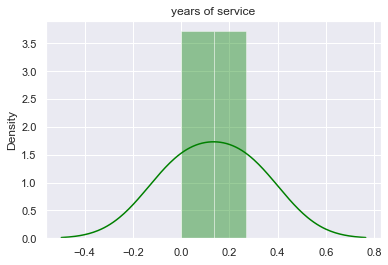

In [29]:
#Plotting the Normal distribution plots
sns.distplot(x[0], color='green')
plt.title("years of service")
plt.show()

In [30]:
#Feature Scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x

array([[ 0.26888583,  0.        ],
       [ 0.1209006 ,  0.        ],
       [-1.28449532,  0.        ],
       [ 1.46109915,  0.        ],
       [ 1.55315864,  0.        ],
       [-0.84005312,  0.        ],
       [ 0.60337981,  0.        ],
       [ 1.72997607,  0.        ],
       [ 0.40814245,  0.        ],
       [ 0.26888583,  0.        ],
       [-0.60348074,  0.        ],
       [-1.47508922,  0.        ],
       [-1.70716059,  0.        ],
       [-2.02223253,  0.        ],
       [ 0.26888583,  0.        ],
       [-1.28449532,  0.        ],
       [ 0.40814245,  0.        ],
       [ 1.21866709,  0.        ],
       [ 0.60337981,  0.        ],
       [ 1.31789249,  0.        ],
       [ 0.78500622,  0.        ],
       [ 1.06349813,  0.        ],
       [ 1.00992197,  0.        ],
       [ 0.33951754,  0.        ],
       [-0.60348074,  0.        ],
       [-0.60348074,  0.        ],
       [ 0.60337981,  0.        ],
       [-1.28449532,  0.        ],
       [-2.02223253,

In [31]:
x.shape

(393, 2)

In [32]:
y.shape

(393,)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [34]:
#LINEAR REGRESSION
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=250, test_size=0.20)
lr= LinearRegression( positive=True, n_jobs=2)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Result  from Linear regression model')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

Result  from Linear regression model
R2 score is  -3.8150037189915444
mean_squared_error 669005496.0986025


In [35]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
lasso_reg =linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
print(lasso_reg.fit(x_train, y_train))
print(lasso_reg.score(x_test,y_test))

Lasso(alpha=50, max_iter=100, tol=0.1)
0.08146081551106177


In [36]:
#RANDOM FOREST
rf=RandomForestRegressor(n_estimators=10, bootstrap=True, random_state=2000)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('result  from random_forestregressor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

result  from random_forestregressor
R2 score is  -1.0843614524095413
mean_squared_error 650559933.6543702


In [37]:
#SVM REGRESSOR
from sklearn.svm import SVR
sv = SVR(kernel ='rbf', gamma=1, epsilon=3)
sv.fit(x_train, y_train)
pred_sv= sv.predict(x_test)
print('result  from svm regrssor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

result  from svm regrssor
R2 score is  -1.0843614524095413
mean_squared_error 650559933.6543702


In [38]:
#KNN REGRESSOR
from sklearn.neighbors  import KNeighborsRegressor
kn =KNeighborsRegressor(n_neighbors=7, algorithm='kd_tree', weights='distance')
kn.fit(x_train, y_train)
pred_kn= kn.predict(x_test)
print('result  from knn regressor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

result  from knn regressor
R2 score is  -1.0843614524095413
mean_squared_error 650559933.6543702


In [39]:
import pickle
filename='salary _predictions'
pickle.dump(kn,open(filename,'wb'))

In [42]:
import numpy as np
a =np.array(y_test)
predicted=np.array(kn.predict(x_test))
df_salary=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
df_salary

,Orginal,Predicted
0,134690,118953.200000
1,77000,83113.571429
2,93000,105936.000000
3,83000,98160.285714
4,78162,134380.000000
...,...,...
74,94350,132178.714286
75,70700,111783.333333
76,111350,118953.200000
77,70768,84595.571429
